In [3]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# 2: Load Data

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/self_made_ds')

Found 2477 files belonging to 3 classes.


In [12]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [13]:
classes = data.class_names
classes

['OverRipe', 'Ripe', 'UnRipe']

# 3: Visualize Data

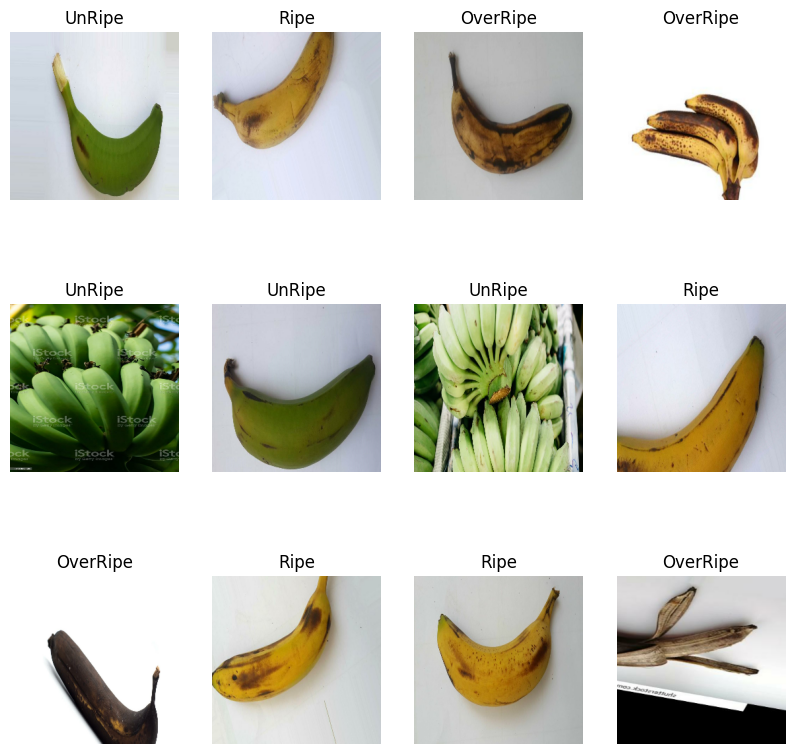

In [14]:
plt.figure(figsize =(10,10))

for image_batch, label_batch in data.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(classes[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

# 4: Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.66302085, 0.6787071 , 0.7218444 ],
          [0.6661765 , 0.6818628 , 0.725     ],
          [0.6625268 , 0.67821306, 0.7213503 ],
          ...,
          [0.7254902 , 0.7647059 , 0.77254903],
          [0.7372549 , 0.7764706 , 0.78431374],
          [0.7283203 , 0.767536  , 0.7753791 ]],
 
         [[0.6596469 , 0.6753332 , 0.71847045],
          [0.6666667 , 0.68235296, 0.7254902 ],
          [0.66502374, 0.68071   , 0.72384727],
          ...,
          [0.7254902 , 0.7647059 , 0.77254903],
          [0.73465073, 0.7738664 , 0.78170955],
          [0.7299058 , 0.76912147, 0.7769646 ]],
 
         [[0.66577816, 0.6736213 , 0.7206801 ],
          [0.67401963, 0.6818628 , 0.7289216 ],
          [0.67047715, 0.6783203 , 0.7253791 ],
          ...,
          [0.7254902 , 0.7647059 , 0.77254903],
          [0.7263787 , 0.76559436, 0.7734375 ],
          [0.7254902 , 0.7647059 , 0.77254903]],
 
         ...,
 
         [[0.67058825, 0.68235296, 0.70980394],
          [0.66588

# 6: Split Data

In [17]:
def get_dataset_partitions(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 57)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train, val, test = get_dataset_partitions(data)

In [19]:
print(len(train), len(val), len(test))

62 7 9


# 7: Build our own Model

In [11]:
IMAGE_SIZE = 256

In [12]:
resize = tf.keras.Sequential([
    #here we gonna supply preprocessing pipeline
    #YAA, our images are already 256x256,but we use this for our safety purpose during trainin if by mistake anyone supplies that image which is not in the desired shape, it will take care of this.
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
])

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
input_shape = (None, IMAGE_SIZE, IMAGE_SIZE,3)
model = models.Sequential([
    resize,
    data_augmentation,
    
    layers.Conv2D(32,(3,3), activation="relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
     
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation = 'softmax')
    ])

model.build(input_shape = input_shape)

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

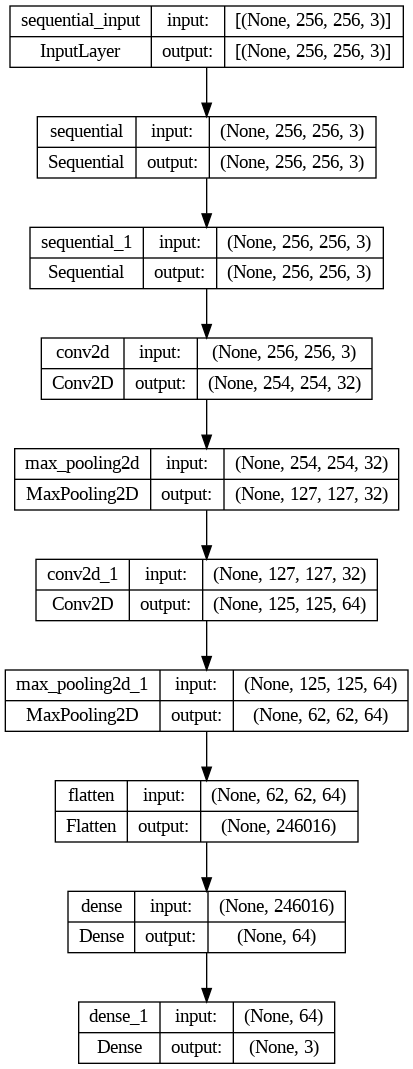

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model.png', show_shapes=True,show_layer_names=True)


In [16]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
62/62 [==============================] - 230s 252ms/step - loss: 0.9816 - accuracy: 0.7567 - val_loss: 0.2811 - val_accuracy: 0.9330
Epoch 2/20
62/62 [==============================] - 29s 259ms/step - loss: 0.2449 - accuracy: 0.9389 - val_loss: 0.4108 - val_accuracy: 0.8973
Epoch 3/20
62/62 [==============================] - 27s 246ms/step - loss: 0.2025 - accuracy: 0.9399 - val_loss: 0.1173 - val_accuracy: 0.9821
Epoch 4/20
62/62 [==============================] - 26s 242ms/step - loss: 0.1654 - accuracy: 0.9567 - val_loss: 0.1578 - val_accuracy: 0.9464
Epoch 5/20
62/62 [==============================] - 27s 245ms/step - loss: 0.1409 - accuracy: 0.9588 - val_loss: 0.3740 - val_accuracy: 0.9107
Epoch 6/20
62/62 [==============================] - 26s 243ms/step - loss: 0.1041 - accuracy: 0.9684 - val_loss: 0.2632 - val_accuracy: 0.9464
Epoch 7/20
62/62 [==============================] - 28s 266ms/step - loss: 0.2347 - accuracy: 0.9466 - val_loss: 0.1057 - val_accuracy: 0.977

In [17]:
test_loss, test_accuracy = model.evaluate(test)
print("test loss:",test_loss)
print("test accuracy:",test_accuracy)

9/9 [==============================] - 12s 32ms/step - loss: 0.0407 - accuracy: 0.9896
test loss: 0.04074713960289955
test accuracy: 0.9895833134651184


In [18]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 8: Model Saving

In [19]:
model.save('/content/drive/MyDrive/New_PROPOSED.h5')

# 9: Plot Performance

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

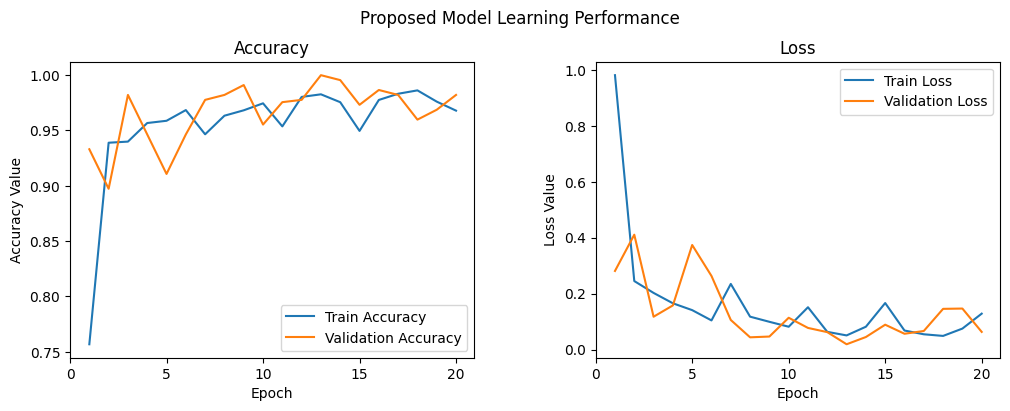

In [23]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt
epochs = 20
f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
t = f.suptitle('Proposed Model Learning Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, acc, label='Train Accuracy')
ax1.plot(epoch_list, val_acc, label='Validation Accuracy')
ax1.set_xticks(np.arange(0,epochs+1,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, loss, label='Train Loss')
ax2.plot(epoch_list, val_loss, label='Validation Loss')
ax2.set_xticks(np.arange(0,epochs+1,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

# 10: Evaluate

In [24]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

In [25]:
categorical_acc = CategoricalAccuracy()
precision = Precision()
recall = Recall()

In [26]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    y_categorical = np.eye(3)[y]  # Convert categorical labels to one-hot encoded format
    categorical_acc.update_state(y_categorical, yhat)
    precision.update_state(y_categorical, yhat)
    recall.update_state(y_categorical, yhat)

accuracy = categorical_acc.result()
precision_result = precision.result()
recall_result = recall.result()

1/1 [==============================] - 0s 42ms/step


In [27]:
print("Accuracy:", accuracy)
print("Precision:", precision_result)
print("Recall:", recall_result)

Accuracy: tf.Tensor(0.9861111, shape=(), dtype=float32)
Precision: tf.Tensor(0.9861111, shape=(), dtype=float32)
Recall: tf.Tensor(0.9861111, shape=(), dtype=float32)


# 10: Confusion Matrix and Classification Report

In [28]:
y_pred_classes = []
y_true_classes = []

for batch in test:
    X, y = batch
    y_pred = model.predict(X)
    y_pred_classes.extend(np.argmax(y_pred, axis=1))
    y_true_classes.extend(y)

y_pred_classes = np.array(y_pred_classes)
y_true_classes = np.array(y_true_classes)

print("y_pred_classes shape:", y_pred_classes.shape)
print("y_true_classes shape:", y_true_classes.shape)

1/1 [==============================] - 0s 42ms/step
y_pred_classes shape: (288,)
y_true_classes shape: (288,)


In [29]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("f1 score:",f1)

f1 score: 0.9860987103174603


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Classification Report:
              precision    recall  f1-score   support

        ripe       0.96      1.00      0.98       103
      unripe       1.00      0.96      0.98        98
    overripe       1.00      1.00      1.00        87

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



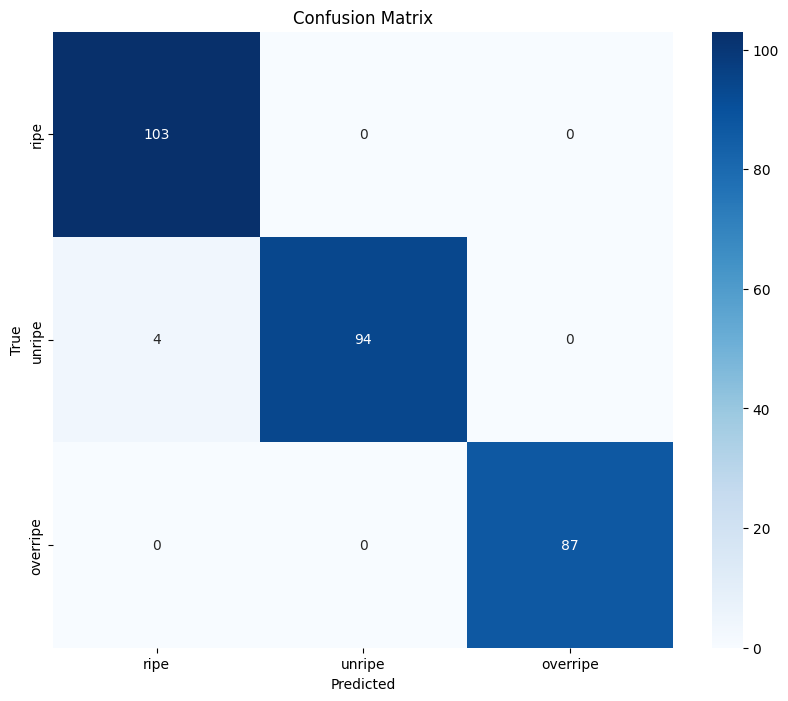

In [32]:
# Compute the classification report
class_names = ['ripe', 'unripe', 'overripe']
classification_rep = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(classification_rep)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 10: Test

In [33]:
import cv2

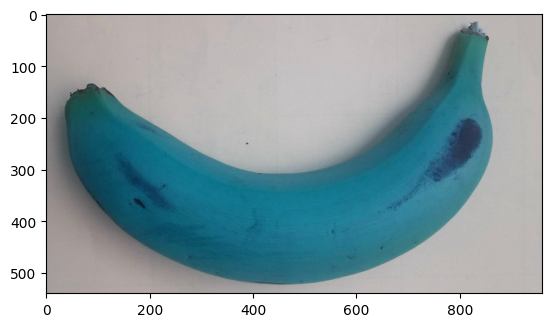

In [34]:
img = cv2.imread('/content/drive/MyDrive/Yellowish_Green/y023.jpg')
plt.imshow(img)
plt.show()

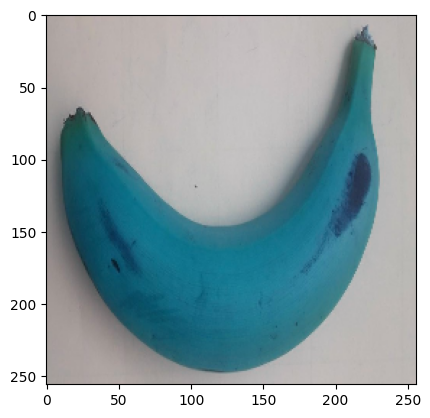

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 322ms/step


array([[0.4017248 , 0.23118351, 0.3670917 ]], dtype=float32)

In [37]:
class_indices = {0: 'Overripe', 1: 'Ripe', 2: 'Unripe'}
predicted_class_index = np.argmax(yhat)
predicted_class = class_indices[predicted_class_index]
print("Predicted class:", predicted_class)

Predicted class: Overripe


# Load the Model

In [1]:
from tensorflow.keras.models import load_model

pick_model = load_model('/content/drive/MyDrive/New_PROPOSED.h5')

# 12: Plot Images with Prediction

In [20]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_label = classes[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])), 2)
    return predicted_label, confidence

1/1 [==============================] - 0s 28ms/step


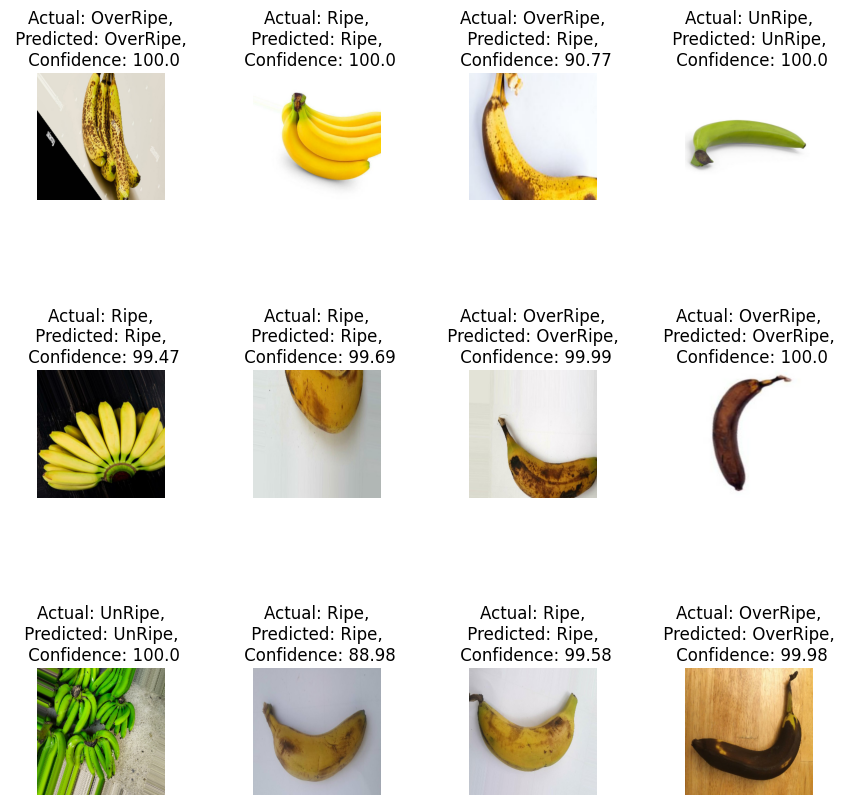

In [21]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.7, wspace=0.7)
for images, labels in test.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy())
        
        pred_label, confidence = predict(pick_model, images[i])
        actual_label = classes[labels[i]]
        
        plt.title(f"Actual: {actual_label},\n Predicted: {pred_label}, \n Confidence: {confidence}")
        
        plt.axis('off')

# 13: Building DataFrame for Actual and Predicted Labels